<a href="https://colab.research.google.com/github/muwongelawrence-tech/colab_projects/blob/main/Pneumonia_vs_normal_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# CONNECTING THE COLAB NOTEBOOK TO GOOGLE DRIVE
# Mounting google drive to get files from there
from google.colab import drive
drive.mount('/content/drive')

print('The current working folder is:')
!pwd

# OR DOWNLOAD FROM ANOTHER SOURCE EG IBM AND EXTRACT FROM HERE 
# !wget https://mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud/heart%20failure.zip
# !unzip heart_failure.zip
# !pwd 


Mounted at /content/drive
The current working folder is:
/content


In [ ]:
import os

base_dir = '/content/drive/MyDrive/chest_xray_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training classes
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


# Directory with our validation classes
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')


# Directory with our test classes
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')


In [ ]:
# CHECKING   A SAMPLE IMAGE FILE NAMES AND THEIR EXTENSIONS IN THE DATASET
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )


print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])


['IM-0510-0001.jpeg', 'IM-0517-0001-0001.jpeg', 'IM-0506-0001.jpeg', 'IM-0507-0001.jpeg', 'IM-0521-0001.jpeg', 'IM-0511-0001.jpeg', 'IM-0549-0001.jpeg', 'IM-0537-0001.jpeg', 'IM-0540-0001.jpeg', 'IM-0539-0001-0001.jpeg']
['person537_bacteria_2263.jpeg', 'person592_bacteria_2434.jpeg', 'person5_bacteria_15.jpeg', 'person571_virus_1114.jpeg', 'person600_bacteria_2457.jpeg', 'person534_bacteria_2251.jpeg', 'person546_virus_1085.jpeg', 'person544_bacteria_2286.jpeg', 'person583_bacteria_2406.jpeg', 'person554_bacteria_2321.jpeg']


In [ ]:
# ANALYSING THE STATISTIS OF THE TRAINING DATA
print('---------------------- TRAINING IMAGE STATISTICS------------\n')
print('total training normal images :', len(os.listdir( train_normal_dir   ) ))
print('total training pneumonia images :', len(os.listdir( train_pneumonia_dir  ) ))


print('\n---------------------- VALIDATION IMAGE STATISTICS-------------\n')

print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation pneumonia images :', len(os.listdir( validation_pneumonia_dir ) ))


print('\n---------------------- TEST IMAGE STATISTICS--------------------\n')

print('total test normal images :', len(os.listdir( test_normal_dir ) ))
print('total test pneumonia images :', len(os.listdir( test_pneumonia_dir ) ))


---------------------- TRAINING IMAGE STATISTICS------------

total training normal images : 1341
total training pneumonia images : 3875

---------------------- VALIDATION IMAGE STATISTICS-------------

total validation normal images : 234
total validation pneumonia images : 391

---------------------- TEST IMAGE STATISTICS--------------------

total test normal images : 8
total test pneumonia images : 8


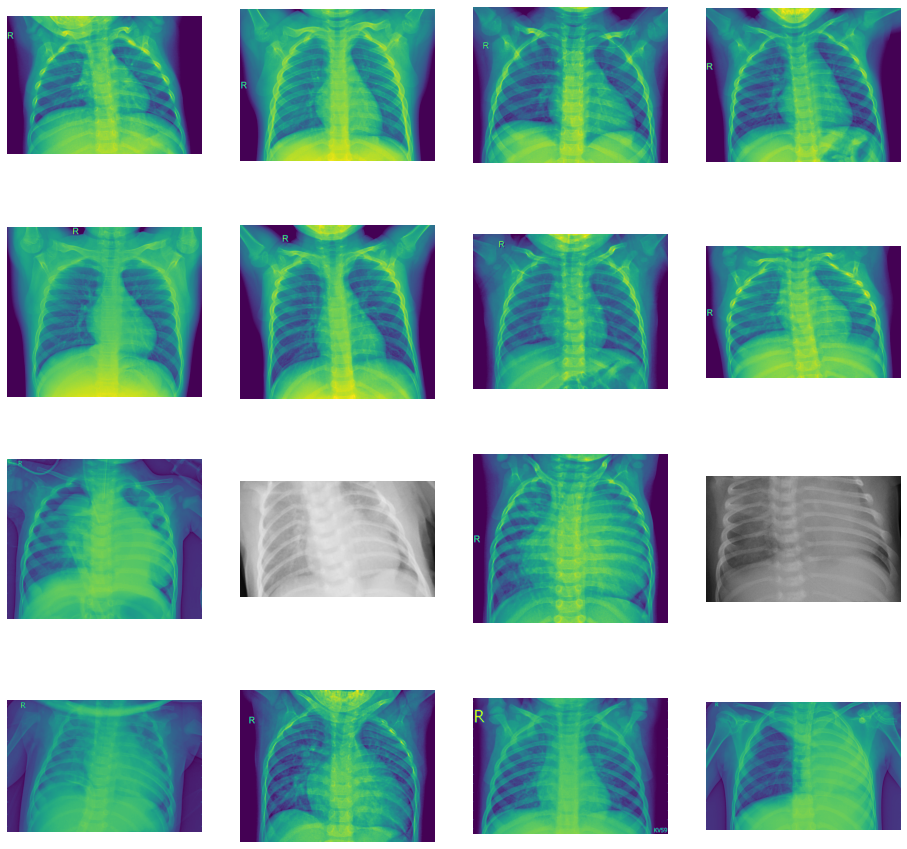

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# VISUALISING SOME IMAGE DATA BEFORE USING IT TO TRAIN THE MODEL(FEATURE EXTRACTOR)
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index] 
               ]

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-8:pic_index] 
               ]


for i, img_path in enumerate(next_normal_pix + next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

#laying out the structure / layers of the  feature extractor
model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 224x224 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # preventing the problem of overfitting using the Dropout layer
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a Dense Nueral Network
    tf.keras.layers.Flatten(), 
    # Fully connected layer of 512 neurons.
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(2, activation="softmax") # categorical activation output  
    # tf.keras.layers.Dense(1, activation = 'sigmoid'),
    
])

# Higher Dropout helps in a way that The neurons can't rely on one input because it might be dropped out at 
# random. This reduces bias due to over-relying on one input, bias is a major cause of overfitting.Neurons will
# edundant details  of inputs.

In [ ]:
# GETTING INFORMATION ABOUT THE SUMMARY OF THE MODEL
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 128)     

In [ ]:
# DATA AUGUMENTATION USING KERAS
# All images will be rescaled by 1./255 after going through the image Generator
# And also performing Data augumentation to enhance the capacity of the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# preparing the train image generator with validation
train_datagen = ImageDataGenerator(
     rescale = 1.0/255,
    #  rotation_range = 40,
     width_shift_range = 0.1,
     height_shift_range = 0.1,
    #  shear_range = 0.1,
     zoom_range = 0.1,
    #  horizontal_flip = True,
    #  fill_mode = 'nearest'
)

# preparing the validation image generator with augmentation
validation_datagen  = ImageDataGenerator( 
                                      rescale = 1.0/255,
                                    # rotation_range = 40,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    # shear_range = 0.1,
                                    zoom_range = 0.1,
                                    # horizontal_flip = True,
                                    # fill_mode = 'nearest'
                          )

# For confusion matrix analysis test data generator is defined as follows.
test_datagen = ImageDataGenerator(rescale=1. / 255)

# ---------------------------------------------------------------------------------
# Flow training images in batches of 300 using train_datagen generator
# ---------------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 100,
                                                    # color_mode="grayscale",
                                                    # class_mode = 'binary',
                                                    class_mode  = 'categorical',
                                                    target_size = (224, 224))     
# ----------------------------------------------------------------------------------
# Flow validation images in batches of 100 using test_datagen generator
# ----------------------------------------------------------------------------------
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 50,
                                                        #  color_mode="grayscale",
                                                        #  class_mode  = 'binary',
                                                        class_mode  = 'categorical',
                                                         target_size = (224, 224))
# ------------------------------------------------------------------------------------
# Flow test images in batches of 20 using test_datagen generator
# ------------------------------------------------------------------------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size = 4,
                                                        #  color_mode="grayscale",
                                                        #  class_mode  = 'binary',
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# ANALYSING HOW THE KERAS IMAGE DATAGENERATOR ASSIGNED CLASSES TO OUR IMAGES IN THE DATA GENERATOR
print('---lets see the classes assigned to the train generator by keras.--------')
train_generator.class_indices
print('---lets see the classes assigned to the validation generator by keras.---')
validation_generator.class_indices
print('---lets see the classes assigned to the test generator by keras----------')
validation_generator.class_indices


---lets see the classes assigned to the train generator by keras.--------
---lets see the classes assigned to the validation generator by keras.---
---lets see the classes assigned to the test generator by keras----------


{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# COMPILING THE MODEL WITH THE LOSS FUNCTION TOGETHER WITH AN OPTIMIZER
model.compile(optimizer='adam',loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
# model.compile( loss = "binary_crossentropy" , optimizer = "adam" , metrics= ['accuracy'])


In [ ]:
# Training to a desired accuracy and quit after reaching that desired accuracy.
# Then with callbacks no need of training the model to very many number of epochs.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.95):
      print("\nReached 95% accuracy so the  training process is cancelled !")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# FITTING / TRAINING THE MODEL ON THE DATASET
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 100,
                    steps_per_epoch = 53, 
                    epochs = 5, 
                    validation_steps = 13, 
                    verbose = 'auto',
                    callbacks = [callbacks]
            )

Epoch 1/5
53/53 [==============================] - 2064s 39s/step - loss: 0.5783 - accuracy: 0.7395 - val_loss: 0.5054 - val_accuracy: 0.6272
Epoch 2/5
53/53 [==============================] - 1378s 26s/step - loss: 0.3714 - accuracy: 0.8165 - val_loss: 0.4649 - val_accuracy: 0.7696
Epoch 3/5
53/53 [==============================] - 1368s 26s/step - loss: 0.2444 - accuracy: 0.9007 - val_loss: 0.3577 - val_accuracy: 0.8496
Epoch 4/5
53/53 [==============================] - 1396s 26s/step - loss: 0.1831 - accuracy: 0.9256 - val_loss: 0.7948 - val_accuracy: 0.7200
Epoch 5/5
53/53 [==============================] - 1378s 26s/step - loss: 0.1867 - accuracy: 0.9264 - val_loss: 0.4729 - val_accuracy: 0.8048


Text(0.5, 1.0, 'Training and validation loss')

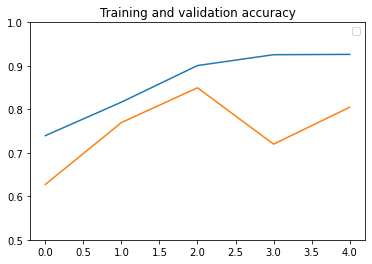

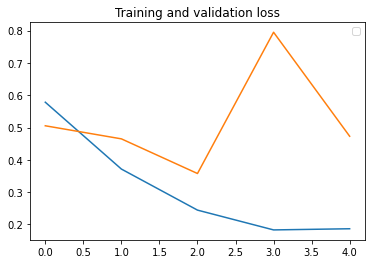

In [ ]:
# VISUALIZATION OF THE PROGRESS OF THE MODEL DURING THE TRAINING PROCESS
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]

loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
# print(epochs)
# print(acc)
# print(val_acc)
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     val_acc )
plt.ylim([0.5, 1])
plt.legend(loc='upper right')
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.legend(loc='upper right')
plt.title ('Training and validation loss'   )

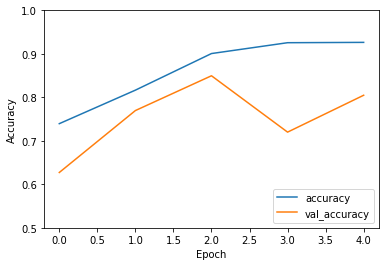

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

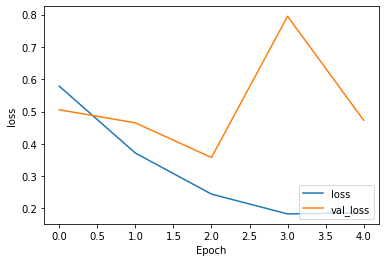

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
# IF MODEL IS ALREADY TRAINED THEN IMPORT AND TEST IT FROM HERE
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/PNEUMONIA PROJECT/PNeumonia_vs_Normal.h5')
# model.summary()

4/4 [==============================] - 5s 1s/step
Confusion Matrix
[[2 6]
 [3 5]]


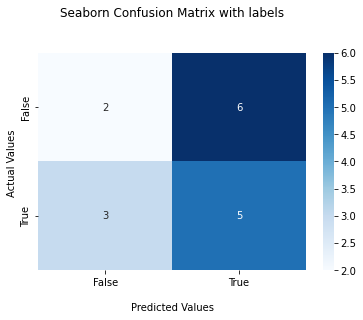

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.40      0.25      0.31         8
   PNEUMONIA       0.45      0.62      0.53         8

    accuracy                           0.44        16
   macro avg       0.43      0.44      0.42        16
weighted avg       0.43      0.44      0.42        16



In [ ]:
# ANALYSING THE PERFORMANNCE OF THE MODEL USING THE  THE CONFUSION MATRIX TABLE
# importing required dependencies.
import numpy as np
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

batch_size = 4
num_of_test_samples = 8

#Confution Matrix and Classification Report
# validation_generator = validation_generator.reset()
Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,  verbose = 'auto')
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

cf_matrix = confusion_matrix(test_generator.classes, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# ----------ANALYSING THE CLASSIFICATION REPORT---------------------
print('Classification Report')
target_names = ['NORMAL', 'PNEUMONIA']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
# saving the trained model to the specied path
# model.save("/content/model")

# creates a HDF5 file 'crop_weed_classifier_model.h5 and then saves it'
model.save('PNeumonia_vs_Normal.h5')  


In [ ]:
# converting the trained  model to tensorflowlite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model 
with open('Pneumonia_vs_Normal_classifier.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import numpy as np

# importing files from computer to colab for testing accuracy of the model.
from google.colab import files
from keras.preprocessing import image

# from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Getting predicting images and  transform them to target size.
  path='/content/' + fn
  # img = image.load_img(path, target_size = (224, 224))
  img = tf.keras.utils.load_img(path, target_size = (224, 224))
  
  # changing the received image into an array of pixels.
  # x = image.img_to_array(img)
  x = tf.keras.utils.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size = 10) 

  print(f'The predicted class is { classes[0] }')
  

  if np.array_equal(classes[0], [1.0 ,0.0]):
    print(fn + " The image is of a normal lung.")
  elif np.array_equal(classes[0], [0.0 ,1.0]):
    print(fn + " is an image of a lung infected by pneumonia")
  else:
    print(fn + " is not a recognized class in the system. ")

Saving NORMAL8.jpeg to NORMAL8.jpeg
Saving NORMAL7.jpeg to NORMAL7.jpeg
Saving NORMAL6.jpeg to NORMAL6.jpeg
Saving NORMAL5.jpeg to NORMAL5.jpeg
Saving NORMAL4.jpeg to NORMAL4.jpeg
Saving NORMAL3.jpeg to NORMAL3.jpeg
Saving NORMAL2.jpeg to NORMAL2.jpeg
Saving NORMAL1.jpeg to NORMAL1.jpeg
Saving n3.jpg to n3.jpg
Saving n2.jpg to n2.jpg
Saving n1.jpg to n1.jpg
1/1 [==============================] - 0s 197ms/step
The predicted class is [1. 0.]
NORMAL8.jpeg The image is of a normal lung.
1/1 [==============================] - 0s 100ms/step
The predicted class is [1. 0.]
NORMAL7.jpeg The image is of a normal lung.
1/1 [==============================] - 0s 83ms/step
The predicted class is [0. 1.]
NORMAL6.jpeg is an image of a lung infected by pneumonia
1/1 [==============================] - 0s 87ms/step
The predicted class is [1.000000e+00 7.423514e-14]
NORMAL5.jpeg is not a recognized class in the system. 
1/1 [==============================] - 0s 91ms/step
The predicted class is [0. 1.]
NOR

1/1 [==============================] - 0s 174ms/step


<ipython-input-31-7e1faf397e4c>:57: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


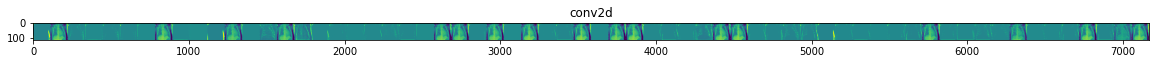

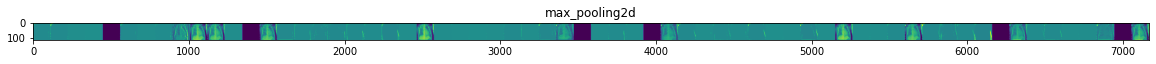

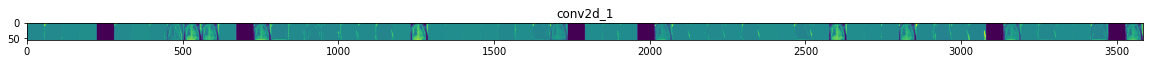

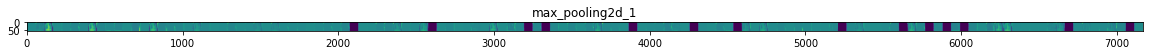

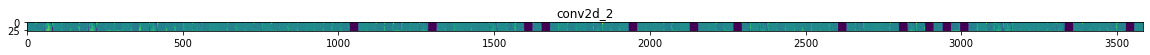

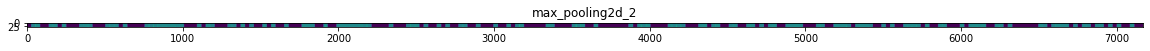

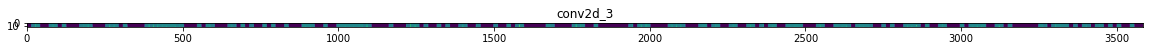

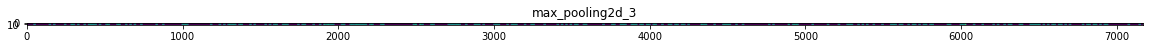

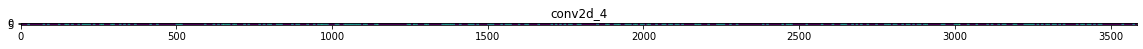

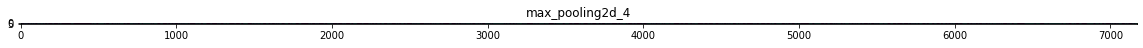

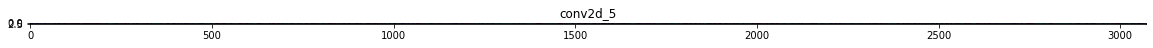

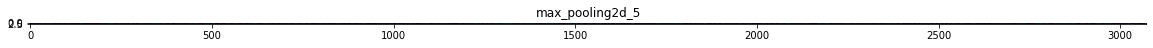

In [ ]:
# Visualizing  of Intermediate Representations of the detected image using a heat map.
import numpy as np
import random
from  tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


# Let's prepare a random input image of a crop or weed from the training set.
beans_img_files = [os.path.join(train_normal_dir, f) for f in train_normal_fnames]
elephant_grass_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_fnames]


img_path = random.choice(beans_img_files + elephant_grass_img_files)
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 